In [33]:
import pandas as pd
import matplotlib.pyplot as plt 

In [34]:
types = ["ask","bid","last"]
dfs = {}

for t in types:
    df = pd.read_csv(
        f"../data/raw/DAT_NT_EURUSD_T_{t.upper()}_202601.csv",
        sep=";",
        header=None,
        usecols=[0,1],
        names=["datetime", t],
        parse_dates=["datetime"],
        date_format="%Y%m%d %H%M%S"
    )
    df = df.set_index("datetime")
    df = df.loc["2026-01-05 00:00":"2026-01-05 00:10"]
    df = df[t].resample("1s").last().dropna()
    dfs[t] = df

ask, bid, last = dfs["ask"], dfs["bid"], dfs["last"]

print(ask.head())
print(bid.head())
print(last.head())


datetime
2026-01-05 00:00:00    1.16822
2026-01-05 00:00:02    1.16822
2026-01-05 00:00:03    1.16820
2026-01-05 00:00:04    1.16818
2026-01-05 00:00:09    1.16817
Name: ask, dtype: float64
datetime
2026-01-05 00:00:00    1.16819
2026-01-05 00:00:02    1.16818
2026-01-05 00:00:03    1.16816
2026-01-05 00:00:04    1.16812
2026-01-05 00:00:09    1.16812
Name: bid, dtype: float64
datetime
2026-01-05 00:00:00    1.16817
2026-01-05 00:00:02    1.16818
2026-01-05 00:00:03    1.16813
2026-01-05 00:00:04    1.16812
2026-01-05 00:00:09    1.16813
Name: last, dtype: float64


Saved!


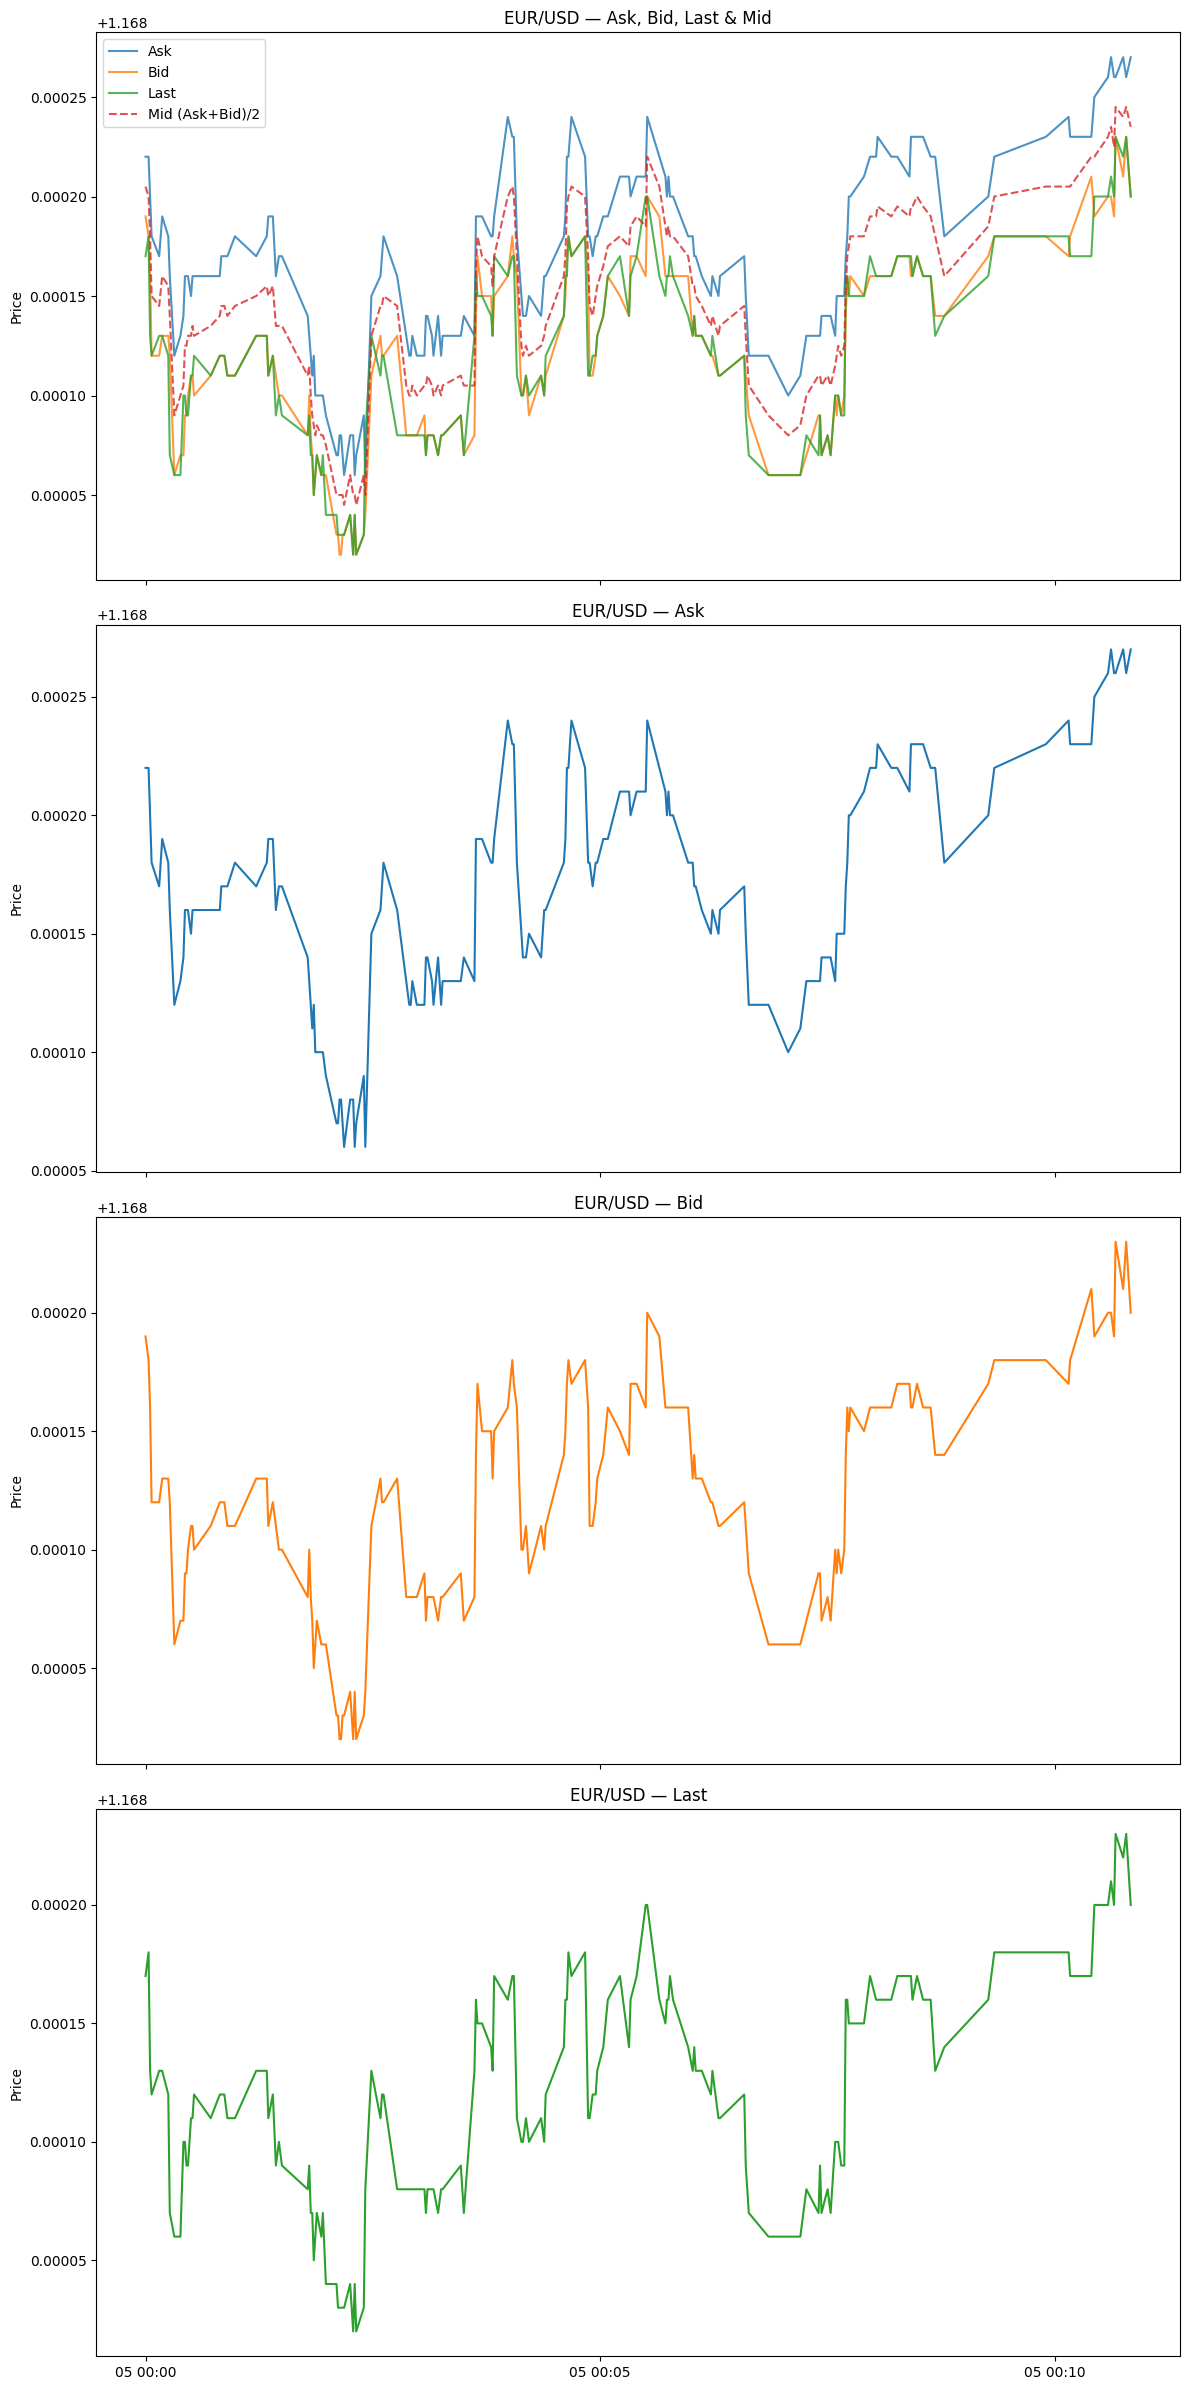

In [35]:
df = pd.concat(dfs, axis=1)
df["mid"] = (df["ask"] + df["bid"]) / 2

fig, axes = plt.subplots(4, 1, figsize=(12, 24), sharex=True)
axes[0].plot(df.index, df["ask"], label="Ask", alpha=0.8)
axes[0].plot(df.index, df["bid"], label="Bid", alpha=0.8)
axes[0].plot(df.index, df["last"], label="Last", alpha=0.8)
axes[0].plot(df.index, df["mid"], label="Mid (Ask+Bid)/2", alpha=0.8, linestyle="--")
axes[0].set_title("EUR/USD — Ask, Bid, Last & Mid")
axes[0].set_ylabel("Price")
axes[0].legend()
for i, t in enumerate(["ask", "bid", "last"]):
    ax = axes[i + 1]
    ax.plot(df.index, df[t], label=t.capitalize(), color=f"C{i}")
    ax.set_title(f"EUR/USD — {t.capitalize()}")
    ax.set_ylabel("Price")
plt.tight_layout()
fig.savefig("../plots/eda/eurusd_ask_bid_last.pdf", bbox_inches="tight")
print("Saved!")
plt.show()

                         ask      bid     last       mid
datetime                                                
2026-01-05 00:00:00  1.16822  1.16819  1.16817  1.168205
2026-01-05 00:00:02  1.16822  1.16818  1.16818  1.168200
2026-01-05 00:00:03  1.16820  1.16816  1.16813  1.168180
2026-01-05 00:00:04  1.16818  1.16812  1.16812  1.168150
2026-01-05 00:00:09  1.16817  1.16812  1.16813  1.168145
2026-01-05 00:00:11  1.16819  1.16813  1.16813  1.168160
2026-01-05 00:00:15  1.16818  1.16813  1.16812  1.168155
2026-01-05 00:00:16  1.16816  1.16812  1.16807  1.168140
2026-01-05 00:00:19  1.16812  1.16806  1.16806  1.168090
2026-01-05 00:00:23  1.16813  1.16807  1.16806  1.168100
Saved!


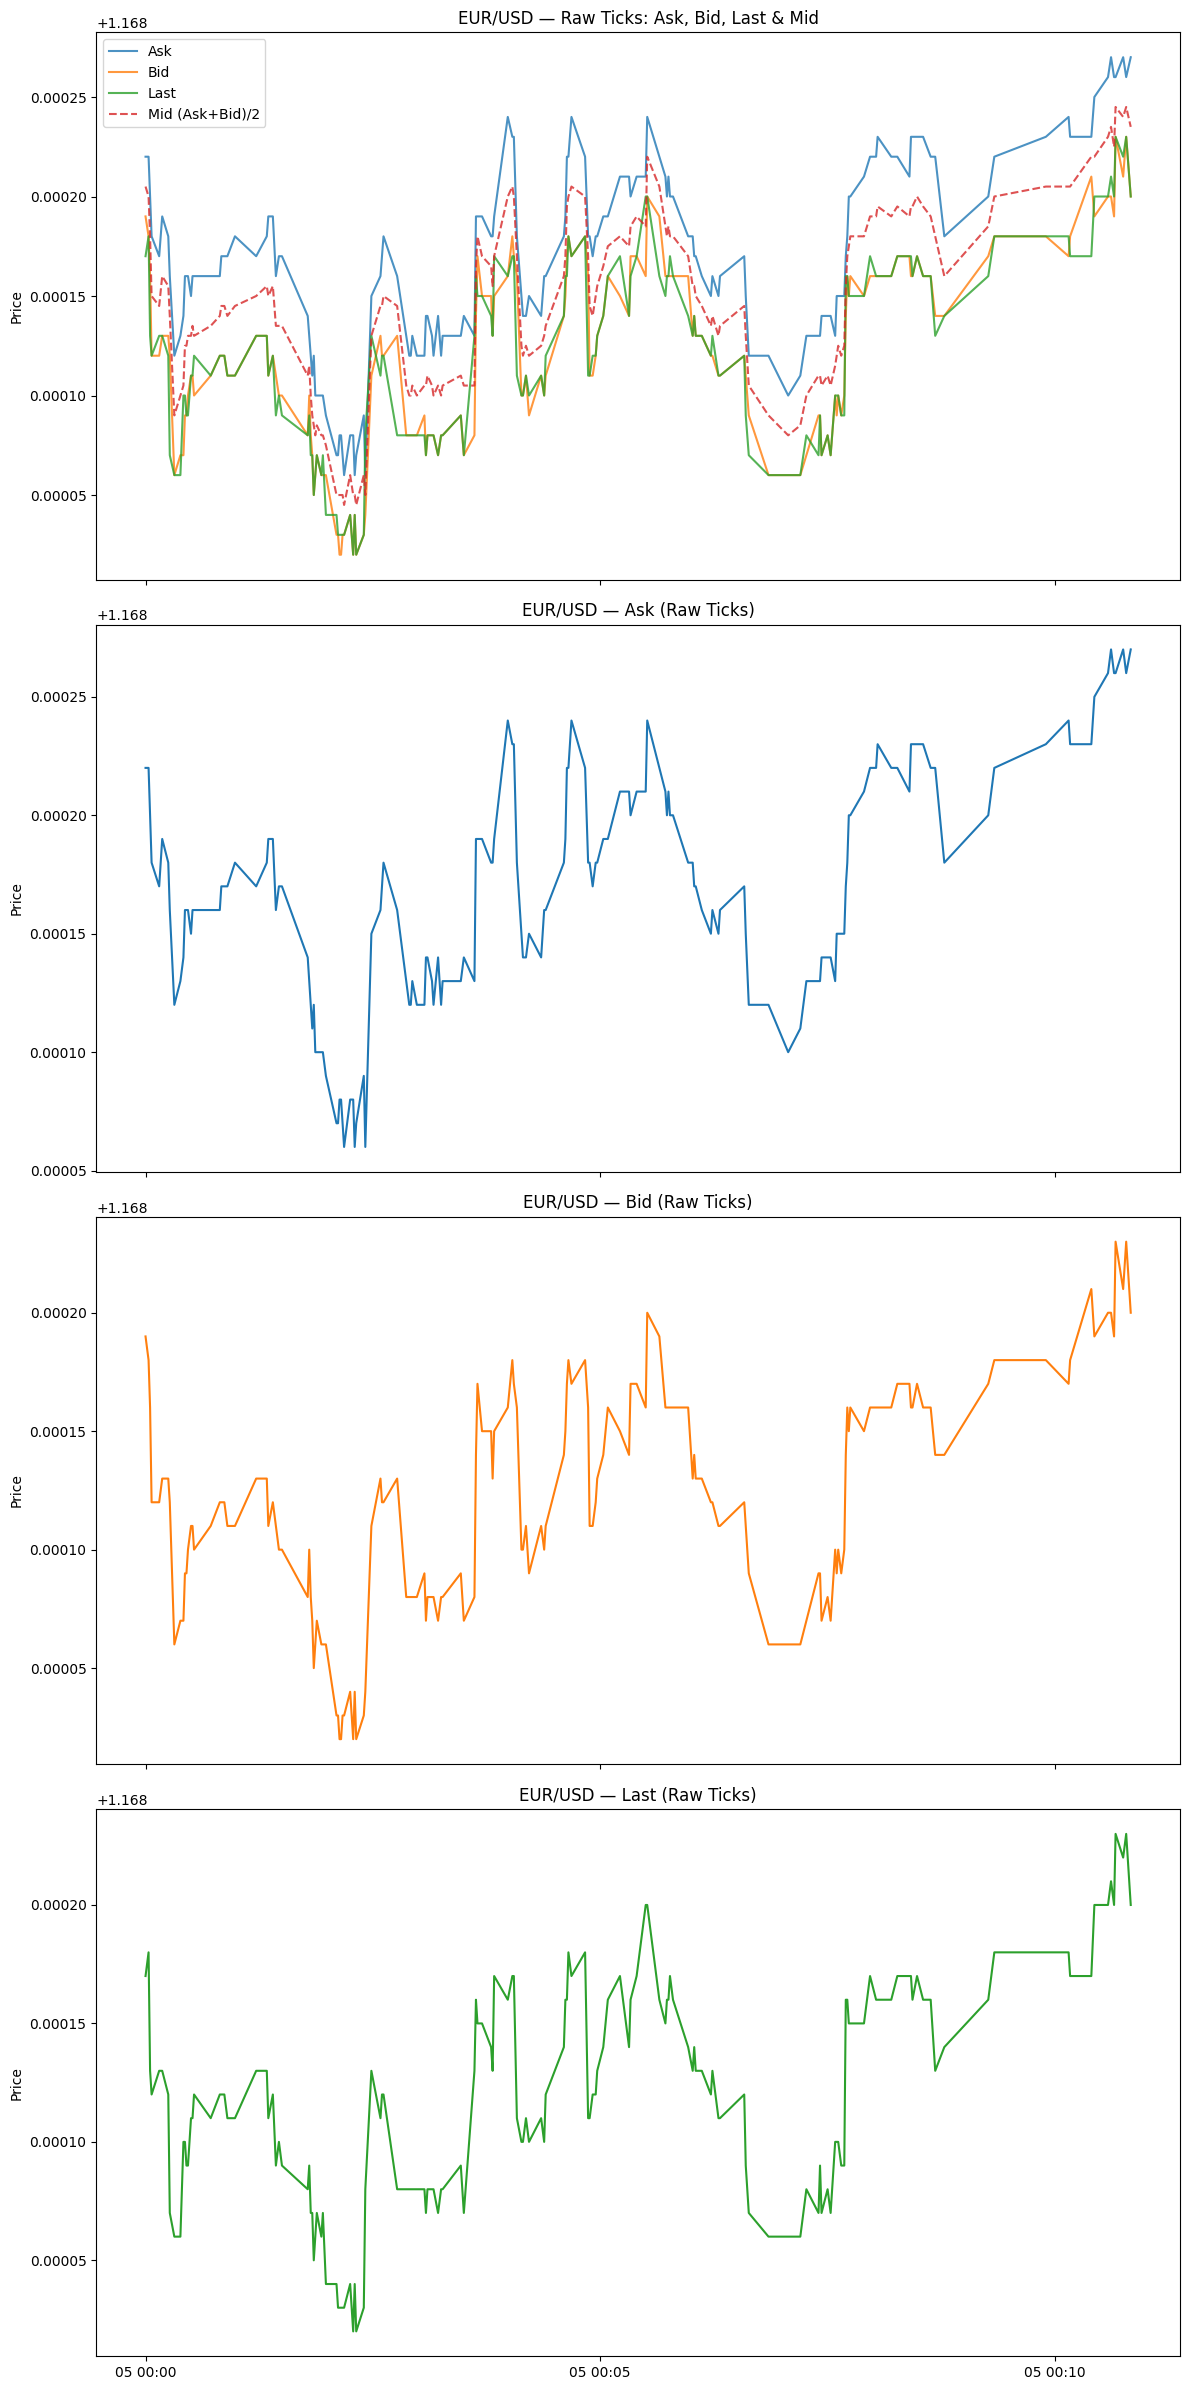

In [36]:
types = ["ask", "bid", "last"]
dfs = {}

for t in types:
    df = pd.read_csv(
        f"../data/raw/DAT_NT_EURUSD_T_{t.upper()}_202601.csv",
        sep=";",
        header=None,
        usecols=[0, 1],
        names=["datetime", t],
        parse_dates=["datetime"],
        date_format="%Y%m%d %H%M%S",
    )
    df = df.set_index("datetime")
    df = df.loc["2026-01-05 00:00":"2026-01-05 00:10"]
    dfs[t] = df

# Merge on datetime using outer join, forward-fill missing values
df = pd.concat([dfs["ask"], dfs["bid"], dfs["last"]], axis=1).sort_index().ffill()
df["mid"] = (df["ask"] + df["bid"]) / 2
print(df.head(10))

fig, axes = plt.subplots(4, 1, figsize=(12, 24), sharex=True)
axes[0].plot(df.index, df["ask"], label="Ask", alpha=0.8)
axes[0].plot(df.index, df["bid"], label="Bid", alpha=0.8)
axes[0].plot(df.index, df["last"], label="Last", alpha=0.8)
axes[0].plot(df.index, df["mid"], label="Mid (Ask+Bid)/2", alpha=0.8, linestyle="--")
axes[0].set_title("EUR/USD — Raw Ticks: Ask, Bid, Last & Mid")
axes[0].set_ylabel("Price")
axes[0].legend()
for i, t in enumerate(["ask", "bid", "last"]):
    ax = axes[i + 1]
    ax.plot(df.index, df[t], label=t.capitalize(), color=f"C{i}")
    ax.set_title(f"EUR/USD — {t.capitalize()} (Raw Ticks)")
    ax.set_ylabel("Price")
plt.tight_layout()
fig.savefig("../plots/eda/eurusd_ask_bid_last_raw.pdf", bbox_inches="tight")
print("Saved!")
plt.show()